# Introduction

In this notebook we will be preparing (cleaning) the dataset "immo_data.csv" from kaggle. This dataset contains information about the appartment (flats) rental offers in germany. It was created by "CorrieBar". It contains all offers from 3 different days during 2018 and 2019

## This project is devided in the same way as the CRISP-DM

I will divide this project into five categories from Business Understanding to Evaluation. You probably notice that "deployment" is being left behind. This is because my results are not being "deployed" to any other system

### Research Questions

I am interested in undrestanding what factors affect the rent price of a flat in the capital of Nordrhein-Westfalen (NRW). Specially: 
1. How expensive is to live in Düsseldorf compare to any other city in Nordrhein-Westfalen (NRW)?
2. How is the distribution of rent prices in the city? if we look for a specific borough/neighborhood and a given size?
3. How do the characteristics of a flat explain the variability in price?
4. Can the rent prices in Düsseldorf be accurately predicted using a linear model?

### Data Understanding

As mentioned before the dataset is hosted on Kaggle and was created by "CorrieBar". The dataset and further information can be found in Kaggle. In the words of the author:

> ### Where is the data from?

>The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.
The scraping process is described in this blog post and the corresponding code for scraping and minimal processing afterwards can be found in this Github repo.
At a given time, all available offers were scraped from the site and saved. This process was repeated three times, so the data set contains offers from the dates 2018-09-22, 2019-05-10 and 2019-10-08.

> ### Content

>The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**First we gather the data**

I will be using the dataset "immo_data" uploaded to Kaggle by CorrieBar. I will concentrate in the NRW state and pay special attention to its capital Düsseldorf

In [2]:
# Import the dataset for all rental offers in Germany

df_germany = pd.read_csv('immo_data.csv')

In [3]:
# get the first look of the dataframe

df_germany.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


**Continue with the assessment and understanding of the data**

In [4]:
# search for duplicates
df_germany.duplicated().sum()

0

Nonetheless, it is possible that people publish the same object many times and thus get a different `scoutID`. In the same manner it is also possible that we have fake entries. Take a look if there are duplicated in a dataset without the `scoutID`

In [5]:
# get a list of all columns without scoutId

list_vars = list(df_germany.columns)

no_scoutID = [i for i in list_vars if i != 'scoutId']

In [6]:
df_germany[no_scoutID].duplicated().sum()

891

There are 891 duplicates if we ignore the scoutId var

In [7]:
# get some information about the variables

df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [8]:
df_germany.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


Some of the variables that might be of interest have big outliers that could affect the further assessmet. Since this is a dataset scrapped from the internet, I assume outliers are just human errors when publishing the flats. Furhtermore, the dataset is big enough, so I will remove this outliers while keepeng 99% of the data

In [9]:
# first let us identify all nummerical variables:
list_num_vars = df_germany.select_dtypes(include=['float', 'int']).columns
list_num_vars

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'yearConstructedRange', 'baseRent', 'livingSpace', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'heatingCosts',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

To identify the variables that need transformation. I will check the relative difference between the maximal value and the 99 percentile. If the relative difference is high, it means all the values above the 99 percentile are way higher (outliers)

In [10]:
# find out the relative difference between the 99 percentile and the max value as a first
# indication of which variables have outliers

rel_diff_outl = []
for i in list_num_vars:
    percentile = np.nanpercentile(df_germany[i], 99) # get the 99 percentile
    max_var = df_germany[i].max() # get the max value of the variable
    rel_diff = max_var / percentile # get the relative difference between both values
    rel_diff_outl.append(rel_diff) # append the value to the list

# create a dataframe with the results combined
dict_1 = dict(variable = list(list_num_vars))
dict_2 = dict(relative_diff = rel_diff_outl)
dict_1.update(dict_2)

rel_diff_df = pd.DataFrame(data=dict_1)

# show dataframe
rel_diff_df.sort_values('relative_diff', ascending=False)

,variable,relative_diff
4,totalRent,5526.854386
8,baseRent,3999.999600
9,livingSpace,617.283333
6,noParkSpaces,560.250000
0,serviceCharge,330.583710
10,noRooms,199.998000
12,floor,124.875000
13,numberOfFloors,90.818182
14,heatingCosts,63.065000
11,thermalChar,7.075505


There are definetly some red flags, that we need to explore in detail:
* `toalRent`
* `baseRent`
* `livingSpace`
* `serviceCharge`
* `noRooms`
* `floor`
* `noParkSpaces`
* `heatingCosts`
* `thermalChar`

for now we will change only the two first variables of the list, since these are our variables of interest

In [15]:
# Before making any change to the data set we will make a clone

df_copy = df_germany.copy()

In [12]:
# as described before, keep only 99.8% of the data and get rid of the outliers

def get_rid_outl(df, list_num_var, percentile):
    """
    INPUT: 
    df: Dataframe
    list_num_var: List of the variables (columns) with outliers that need to be deleted
    percentile: float between 0 and 100: Percentage of the data that will be kept 
    
    OUTPUT:
    DataFrame with the defined amount of data. This means a DataFrame without outliers
    """
    
    perc_dict = {}
    for col in list_num_var: # first, calculate all the percentiles before removing any
        # row, otherwise you will remove more rows than necessary
        value_perc = np.nanpercentile(df[col], percentile)
        value_perc_dict = {col: value_perc}
        perc_dict.update(value_perc_dict)
        
    for var in list_num_var:    
        df = df.loc[(df[var] <= perc_dict[var]) ^ (df[var].isnull())] # include nan values
    
    return df

In [16]:
# for comparison
df_copy.shape

(268850, 49)

In [17]:
# create a dataframe without outliers for the main variables
df_sub = get_rid_outl(df_copy, ['totalRent', 'baseRent', 'heatingCosts'], 99)

In [18]:
# check how many rows were removed
df_sub.shape

(265493, 49)

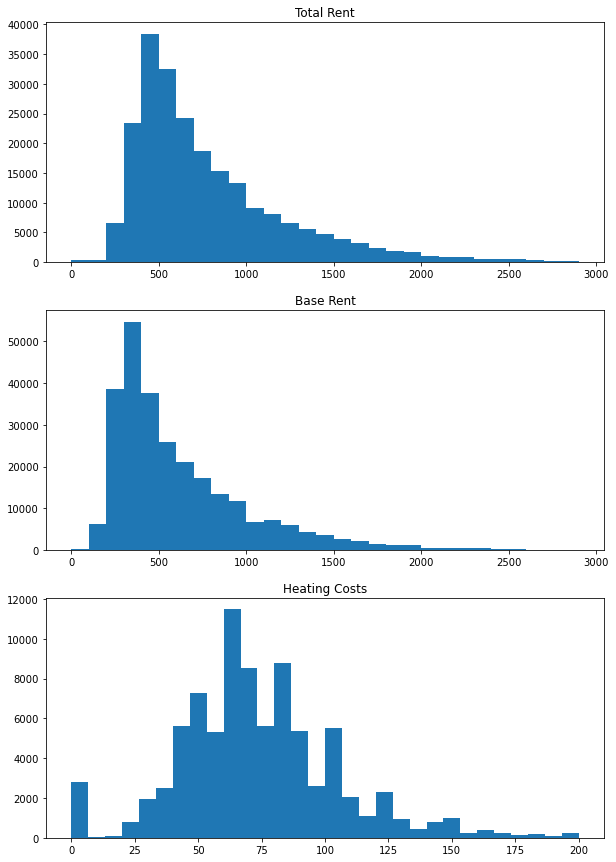

In [19]:
# get a better understanding of the variables
plt.figure(figsize=[10,15])

bin_edges = np.arange(0, df_sub.totalRent.max()+100, 100)

plt.subplot(3,1,1)
plt.hist(data=df_sub, x='totalRent', bins=bin_edges)
plt.title('Total Rent')

plt.subplot(3,1,2)
plt.hist(data=df_sub, x='baseRent', bins=bin_edges)
plt.title('Base Rent')

plt.subplot(3,1,3)
plt.hist(data=df_sub, x='heatingCosts', bins=30)
plt.title('Heating Costs');


For the two first variables we see a right skewed histogram - as expected. Both very similar, but total rent is light more to the right. We will have to investigate this further. The heating costs look somehow normally distributed. 

Now I would like to understand the categorical variables

In [20]:
# get a datafram only with the categorical variables
df_cat_var = df_copy.select_dtypes(include=['object']).copy()

In [21]:
# Get the unique values of each variable 
for col in df_cat_var.columns:
    print('{}\n'.format(col))
    print('{}\n'.format(df_cat_var[col].value_counts()))

regio1

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

heatingType

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating             

In [22]:
df_sub.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

### Summary Data Understanding - ready for Data Preparation

* around 900 duplicates when ignoring scoutId
* Meaning of "Range" column unknown
* Meaning of `firingType` unknown
* Meaning of `priceTrend` unknown
* Meaning of `facilities` unknown
* Telekom columns are not necessary
* Identified variables with outliers need to be corrected
* Main variable price/rent unclear
* NaN values in the numerical variables
* `yearConstructed` has to be before 2020
* Column `regio1` and `geo_bln` are the same
* Columns `geo_krs` and `regio2` seem to be the same
* Column `regio3` need further analyse - possible regions in the cities

### Data Preparation

in this section I will be cleaning the raw data to get a final dataset ready for modeling

In [34]:
# create a copy of the data

df_clean = df_germany.copy()

**1)** Get rid of all duplicates while ignoring the scout ID variable 

This is important since we do not want to treat duplicates as different offers. It would bias our results

In [35]:
# get rid of all duplicates (if we ignore scoutId)
df_clean = df_clean[no_scoutID].drop_duplicates()

In [36]:
# Test
df_clean[no_scoutID].duplicated().sum()

0

**2)** Get rid of all unwanted columns

many columns are not necessary to answer the research questions. As mention in the **data understanding** section, the meaning of some columns is not clear. In this part we drop all those variables

In [37]:
# create a list of all the columns to be dropped
unwanted_col = ['telekomTvOffer', 
                'telekomHybridUploadSpeed', 
                'picturecount', 
                'telekomUploadSpeed', 
                'firingTypes', 
                'yearConstructedRange', 
                'houseNumber', 
                'street', 
                'streetPlain', 
                'baseRentRange', 
                'thermalChar',
                'noRoomsRange', 
                'livingSpaceRange', 
                'description', 
                'facilities',
                'pricetrend']

In [38]:
# get rid of all the unwanted columns
df_clean.drop(columns=unwanted_col, inplace=True)

In [39]:
# test
df_clean.shape

(267959, 32)

**3)** Get rid of outliers in important variables

Since outliers are most likely mistakes, and because there are just a few of them, I will get rid of them, whithout compromising the representativeness of the data. We still keep 99.8% of all observations

In [41]:
# create a list of all variables with outliers
var_with_outl = ['totalRent',
                 'baseRent',
                 'livingSpace',
                 'serviceCharge',
                 'noRooms',
                 'floor',
                 'noParkSpaces',
                 'numberOfFloors',
                 'heatingCosts']

In [42]:
# use the function get_rid_outl() to get rid of the outliers without missing the NaNs

df_clean = get_rid_outl(df_clean, var_with_outl, 99)

In [43]:
# Test 1
df_clean.shape

(258001, 32)

In [44]:
# Test 2
df_clean.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,geo_plz,noRooms,floor,numberOfFloors,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,251513.000000,219286.000000,202854.000000,87500.000000,258001.000000,258001.000000,258001.000000,258001.000000,208753.000000,163466.000000,82169.000000,76889.000000,44858.000000,44858.000000
mean,144.009800,767.389806,1966.147850,1.055897,605.384389,71.070818,37134.134399,2.577013,2.012972,3.392687,72.640650,2013.850356,89.107009,0.199799
std,70.957003,424.478356,46.851111,0.390981,379.227977,26.862016,27748.229899,0.901017,1.410430,1.508714,31.372291,11.139833,5.405607,0.009707
min,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,852.000000,1.000000,-1.000000,0.000000,0.000000,1015.000000,71.430000,0.170500
25%,94.000000,465.000000,1950.000000,1.000000,334.000000,54.000000,9126.000000,2.000000,1.000000,2.000000,53.210000,2012.000000,90.760000,0.191500
50%,132.000000,637.000000,1972.000000,1.000000,480.000000,66.820000,38533.000000,3.000000,2.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,180.000000,950.000000,1996.000000,1.000000,770.000000,85.000000,56220.000000,3.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,441.000000,2850.000000,2090.000000,4.000000,2500.000000,180.000000,99998.000000,5.000000,8.000000,11.000000,200.000000,2919.000000,90.760000,0.227600


**4)** Get a better understanding of the response variables and get rid of NaN values

I suspect that total Rent is made up from the base Rent plus some further costs (this could be heating, service charge or other costs)

In [45]:
# how many NaN values has total and base Rent and service Charge
print(df_clean.totalRent.isnull().sum())
print(df_clean.baseRent.isnull().sum())
print(df_clean.serviceCharge.isnull().sum())

38715
0
6488


In [46]:
# number of zeros in the three variables
print(df_clean[df_clean.totalRent == 0]['totalRent'].shape[0])
print(df_clean[df_clean.baseRent == 0]['totalRent'].shape[0])
print(df_clean[df_clean.serviceCharge == 0]['totalRent'].shape[0])

230
87
3214


In [47]:
# change all NaNs in total rent and service Charge to zeros
df_clean.totalRent.fillna(0, inplace=True)
df_clean.serviceCharge.fillna(0, inplace=True)

In [48]:
# number of zeros after replacement of NaNs 
print(df_clean[df_clean.totalRent == 0]['totalRent'].shape[0])
print(df_clean[df_clean.serviceCharge == 0]['totalRent'].shape[0])

38945
9702


In [49]:
# number of zeros in base Rent
df_clean[df_clean.baseRent == 0]['baseRent'].shape[0]

87

In [50]:
# are there rows where the base and total rent are zero 
df_clean[(df_clean.baseRent == 0) & (df_clean.totalRent == 0)].shape[0]

31

We have to get rid of the 32 rows, as the price for the rent is not given

In [51]:
# For control, print the number of rows before removing the 32 rows
print(df_clean.shape[0])

258001


In [52]:
# reset the index
df_clean.reset_index()

,index,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,hasKitchen,...,numberOfFloors,garden,regio2,regio3,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,False,...,3.0,True,Dortmund,Schüren,NaN,NaN,NaN,NaN,NaN,May19
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,0.0,1871.0,2.0,False,...,NaN,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN,NaN,2019.0,NaN,NaN,May19
2,2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,False,...,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,NaN,NaN,NaN,NaN,NaN,Oct19
3,3,Sachsen,58.15,district_heating,False,True,0.0,1964.0,NaN,False,...,NaN,False,Mittelsachsen_Kreis,Freiberg,87.23,NaN,NaN,NaN,NaN,May19
4,4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,False,...,NaN,False,Bremen,Neu_Schwachhausen,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257996,268844,Nordrhein_Westfalen,80.00,gas_heating,False,False,670.0,NaN,NaN,False,...,3.0,False,Essen,Horst,NaN,NaN,2019.0,NaN,NaN,Feb20
257997,268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,False,...,NaN,False,Weilheim_Schongau_Kreis,Eberfing,NaN,NaN,NaN,NaN,NaN,Feb20
257998,268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,True,...,1.0,False,Bergstraße_Kreis,Viernheim,NaN,NaN,2015.0,NaN,NaN,May19
257999,268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,False,...,2.0,True,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,NaN,NaN,2019.0,NaN,NaN,Feb20


In [53]:
# get the index of all rows to be removed
rows_to_delete_list = list(df_clean[(df_clean.baseRent == 0) & (df_clean.totalRent == 0)].index)
print(len(rows_to_delete_list))

31


In [54]:
# drop all rows
df_clean = df_clean.drop(index=rows_to_delete_list)

In [55]:
# test the number of deleted rows was correct
df_clean.shape[0]

257970

In [56]:
# Test there are no further rows where base and total rent are zero
df_clean[(df_clean.baseRent == 0) & (df_clean.totalRent == 0)]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,hasKitchen,geo_bln,...,numberOfFloors,garden,regio2,regio3,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date


We now go back to the variables of interest (costs/price). First we take a look to these variables

In [57]:
# take a look at the costs
df_clean[['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

,totalRent,baseRent,heatingCosts,serviceCharge
0,840.0,595.0,NaN,245.00
1,0.0,800.0,NaN,134.00
2,1300.0,965.0,NaN,255.00
3,0.0,343.0,87.23,58.15
4,903.0,765.0,NaN,138.00
...,...,...,...,...
268844,670.0,590.0,NaN,80.00
268845,910.0,820.0,NaN,90.00
268846,1150.0,930.0,NaN,220.00
268847,930.0,650.0,NaN,220.00


By looking at the data, it becomes pretty clear that the total rent comes from base rent and the service charges. This means, all zero values in the total rent column can be calculated with the other two variables

In [59]:
# create a function that gives me the sume of base rent and extra charges if the total
# rent is zero
def calculate_rent(total_rent, basic_rent, extra_charges):
    if total_rent == 0:
        return basic_rent + extra_charges 
    else:
        return total_rent

In [60]:
# apply the function to each row
df_clean['total_rent_new'] = df_clean.apply(lambda x: calculate_rent(x['totalRent'], 
                                                               x['baseRent'],
                                                               x['serviceCharge']),
                                      axis = 1)

In [61]:
# Test there are no zeros after transformation 
df_clean[df_clean.total_rent_new == 0]['total_rent_new']

Series([], Name: total_rent_new, dtype: float64)

In [62]:
# test the numbers make sense
df_clean[['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge', 'total_rent_new']]

,totalRent,baseRent,heatingCosts,serviceCharge,total_rent_new
0,840.0,595.0,NaN,245.00,840.00
1,0.0,800.0,NaN,134.00,934.00
2,1300.0,965.0,NaN,255.00,1300.00
3,0.0,343.0,87.23,58.15,401.15
4,903.0,765.0,NaN,138.00,903.00
...,...,...,...,...,...
268844,670.0,590.0,NaN,80.00,670.00
268845,910.0,820.0,NaN,90.00,910.00
268846,1150.0,930.0,NaN,220.00,1150.00
268847,930.0,650.0,NaN,220.00,930.00


Furthermore, we need to make sure, all entries make sense. Identify rows where the base rent is higher than the total rent, which by definition cannot be true

In [63]:
df_clean[df_clean['total_rent_new'] < df_clean['baseRent']][['baseRent', 'totalRent', 'serviceCharge']]

,baseRent,totalRent,serviceCharge
1317,1100.0,1040.0,60.0
1701,1832.0,1509.0,0.0
2122,1749.0,1440.0,0.0
3171,800.0,400.0,0.0
9332,250.0,75.0,0.0
...,...,...,...
257961,700.0,200.0,180.0
261708,99.0,97.0,15.0
263216,250.0,3.0,120.0
264291,1550.0,1450.0,300.0


Fortunatelly there are only 180 rows. Instead of going row by row trying to figure out what the error is, I will just drop these rows from the dataset. 

In [64]:
# For control, print the number of rows before removing the 190 rows
print(df_clean.shape[0])

257970


In [65]:
# get a dataset without the rows
df_clean = df_clean[df_clean['total_rent_new'] >= df_clean['baseRent']]
print(df_clean.shape[0])

257796


Great! Furthermore, we should not have any NaN value anymore

In [66]:
# How many NaN values are there
df_clean.totalRent.isnull().sum()

0

**5)** Solving the NaN values of the nummerical variables

In [67]:
# get a list of the nummerical values in the df_clean
list_num_vars = list(df_clean.select_dtypes(include=['float', 'int']).columns)

In [68]:
# how many NaNs are there
df_clean[list_num_vars].isnull().sum()

serviceCharge                0
totalRent                    0
yearConstructed          55064
noParkSpaces            170367
baseRent                     0
livingSpace                  0
noRooms                      0
floor                    49200
numberOfFloors           94467
heatingCosts            175680
lastRefurbish           180979
electricityBasePrice    212964
electricityKwhPrice     212964
total_rent_new               0
dtype: int64

In [69]:
df_clean.floor.value_counts()

 1.0    62212
 2.0    55434
 3.0    36758
 0.0    23770
 4.0    19109
 5.0     7432
 6.0     2205
 7.0      879
 8.0      490
-1.0      307
Name: floor, dtype: int64

* The heating costs are a special case in Germany. Usually, the heating costs are included in the service Charge (so called "Nebenkosten"). To clean the dataset I will assume, people who did include a service charge and heating costs in the formular, meant to say that heating costs are part of the serving charge. And the other way around.
* I do not expect the electricity price to play a role in the rent, as in germany the price for electricity is pretty homogeneous. I will drop both columns.
* The year of construction and the last refurbish are both dates variables. This means we have to change the data type.
* For the number of Park spaces, I will assume that if it was not specified it is zero. Furthermore I am convinced that a flat or a house can have max. 6 park spaces. Everything above is most likely free park spaces on the street, but not included in the rent. It is common practice to sub rent parkspaces in big cities, which means a flat or house including park spaces can have an impact in the price. I will assess this later, when fitting the regression
* I have to dig into the variables `floor` and `numberOfFloor` I would not expect any flat or house to have more than 4 floors. Most common practice in germany is one floor. The NaNs have to be somewhere between 1 and 4. I will try to impute this by using the living space as a proxy

In [71]:
# start with the easy one: drop the electricity costs
df_clean = df_clean.drop(columns=['electricityBasePrice', 'electricityKwhPrice'])

KeyError: "['electricityBasePrice' 'electricityKwhPrice'] not found in axis"

take a look to the heating costs compare to the other costs variables

In [72]:
df_clean[['baseRent', 'heatingCosts', 'serviceCharge', 'total_rent_new']].sample(20)

,baseRent,heatingCosts,serviceCharge,total_rent_new
16736,519.0,71.0,230.0,749.0
205124,660.0,182.0,156.0,998.0
197992,930.0,NaN,300.0,1230.0
172590,392.0,NaN,200.0,592.0
34299,462.0,80.0,157.0,699.0
3984,359.0,NaN,145.0,504.0
69705,1250.0,NaN,200.0,1550.0
174435,680.0,NaN,150.0,830.0
15916,650.0,NaN,200.0,850.0
24946,712.0,NaN,150.0,850.0


In [73]:
# are there rows where the heating costs are higher than the service charge?
df_clean[df_clean.heatingCosts > df_clean.serviceCharge][['heatingCosts', 'serviceCharge', 'total_rent_new']].sample(20)

,heatingCosts,serviceCharge,total_rent_new
84825,150.00,99.00,999.00
229938,69.08,57.33,343.97
15270,40.00,35.00,845.00
12501,70.00,45.00,468.37
21547,50.00,45.00,370.00
107241,200.00,0.00,1540.79
205288,55.00,35.41,262.31
66420,63.00,50.00,318.00
25484,100.00,70.00,735.00
207520,150.00,100.00,2450.00


Giving the results above it is very likely that if the heating costs are higher than the service charge, these (the heating costs) have to be added to the total rent. 

In [74]:
# Change all NaNs in the heating costs to zeros
df_clean.heatingCosts.fillna(0, inplace=True)

C:\Users\Juan\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [75]:
# set a function that follows the logic above

def heating_costs(heating_costs, service_charge, total_rent):
    if heating_costs > service_charge:
        return total_rent + heating_costs
    else:
        return total_rent

In [76]:
# get a column with the total rent including the heating costs

df_clean['rent_incl_hc'] = df_clean.apply(lambda x: heating_costs(x['heatingCosts'],
                                                                  x['serviceCharge'],
                                                                  x['total_rent_new']), axis = 1)

In [77]:
# take a look to the results
df_clean[df_clean.heatingCosts > df_clean.serviceCharge][['heatingCosts', 'serviceCharge', 'total_rent_new', 'rent_incl_hc']].sample(20)

,heatingCosts,serviceCharge,total_rent_new,rent_incl_hc
111973,125.00,70.00,494.00,619.00
172517,71.00,69.00,457.00,528.00
173957,108.70,69.97,532.05,640.75
174341,100.00,91.00,599.00,699.00
34171,50.00,40.00,385.00,435.00
122548,47.00,43.00,290.97,337.97
228002,90.00,70.00,460.00,550.00
5161,66.00,26.00,357.00,423.00
78122,113.00,110.00,781.00,894.00
187641,95.00,61.00,408.00,503.00


Everything worked as expected! we have our one response variable fully defined.

Now change the data type of year constructed and last refurbish to categories. Make sure the categories have an order

In [78]:
# how many entries have a construction or las refurbish year above 2020 - 
# by definition not possible
print(df_clean[df_clean.yearConstructed > 2020].shape[0])
print(df_clean[df_clean.lastRefurbish > 2020].shape[0])

20
13


As there are not many entries with years above 2020 I will just drop this rows before looking inte one by one. 

In [79]:
# change all NaNs to zeros
df_clean.yearConstructed.fillna(0, inplace=True)
df_clean.lastRefurbish.fillna(0, inplace=True)

In [80]:
# print the number of rows for testing
print(df_clean.shape[0])

257796


In [81]:
# keep all rows that are equal or less than the year 2020
df_clean = df_clean[(df_clean.yearConstructed <= 2020) & (df_clean.lastRefurbish <= 2020)]

In [82]:
# Test
print(df_clean.shape[0])

257763


Change the data types to categories

In [83]:
# to create a string without any decimal, I first transform it to integer. 
df_clean.yearConstructed = df_clean.yearConstructed.astype(int).astype(str)
df_clean.lastRefurbish = df_clean.lastRefurbish.astype(int).astype(str)

C:\Users\Juan\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
# Replace all '0' for 'NO_INFORMATION'
df_clean['yearConstructed'] = df_clean['yearConstructed'].replace('0', 'NO_INFORMATION')
df_clean['lastRefurbish'] = df_clean['lastRefurbish'].replace('0', 'NO_INFORMATION')

C:\Users\Juan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
# Test that changes worked 
df_clean[df_clean['yearConstructed'] > '1800']['yearConstructed'].value_counts().sort_index()

1803                  3
1804                  1
1805                  4
1806                  2
1807                  1
                  ...  
2017               3631
2018               8201
2019              10341
2020               2031
NO_INFORMATION    55060
Name: yearConstructed, Length: 216, dtype: int64

Make sure the categories are always displayed in the right order

In [87]:
# create lists with the right order
yearCon_order = list(df_clean.yearConstructed.value_counts().sort_index().index)
yearRef_order = list(df_clean.yearConstructed.value_counts().sort_index().index)

# create the categorical elements
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)

# change the data type to categories
df_clean.yearConstructed = df_clean.yearConstructed.astype(ordered_yearCon)
df_clean.lastRefurbish = df_clean.lastRefurbish.astype(ordered_yearRef)

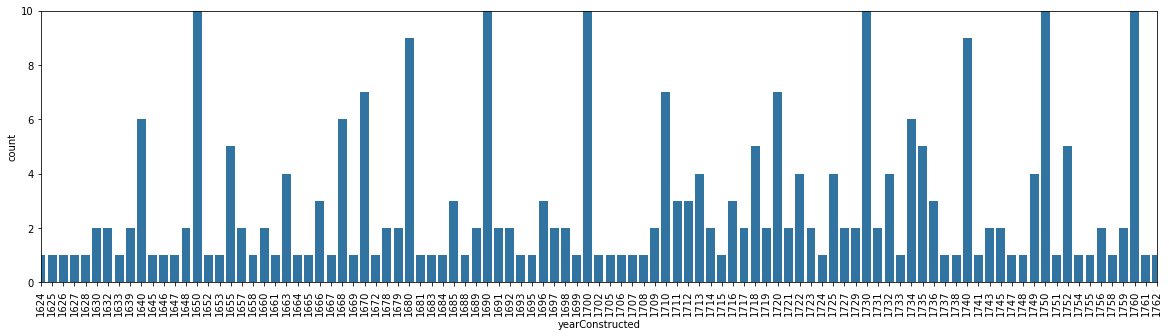

In [88]:
# test the changes worked
base_color = sns.color_palette()[0]
plt.figure(figsize=[20,5])
sns.countplot(data=df_clean, x='yearConstructed', color=base_color)
plt.xticks(rotation=90)
plt.xlim((100, 200))
plt.ylim((0,10));

Great! Now replace all park spaces with zeros

In [89]:
df_clean['noParkSpaces'].fillna(0, inplace=True)

C:\Users\Juan\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Dig into the variables floor and numberOfFloors

In [90]:
df_clean[['floor', 'numberOfFloors']].sample(20)

,floor,numberOfFloors
43699,2.0,2.0
1832,3.0,NaN
59616,3.0,3.0
230472,2.0,2.0
182668,0.0,NaN
70955,NaN,NaN
24274,NaN,2.0
233693,5.0,NaN
186563,NaN,NaN
24686,0.0,2.0


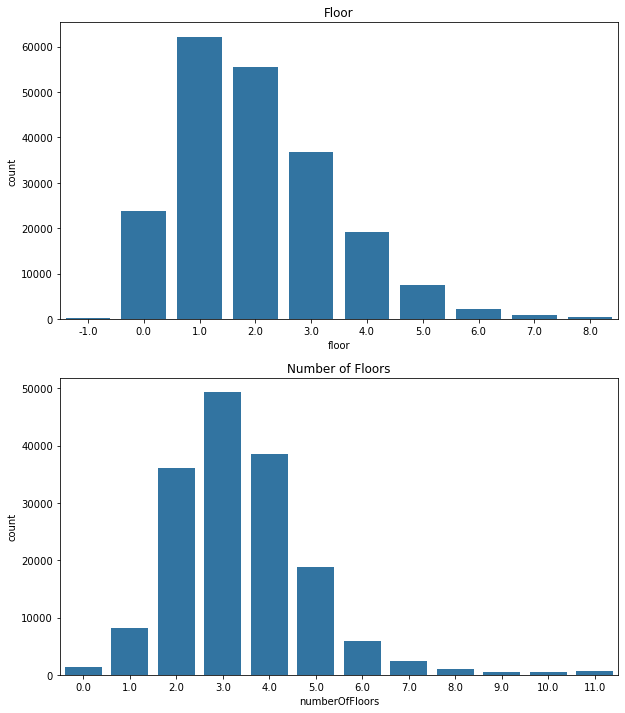

In [91]:
# let us take a look at the distribution of both variables 
plt.figure(figsize=[10,12])

bin_edges = np.arange(0, 20, 0.5)

plt.subplot(2,1,1)
sns.countplot(data=df_clean, x='floor', color=base_color)
plt.title('Floor')

plt.subplot(2,1,2)
sns.countplot(data=df_clean, x='numberOfFloors', color=base_color)
plt.title('Number of Floors');

Floor and number of floors are categorical variables since they mean in which floor is the flat. There is no way we can impute it, as the floor has also an impact on the price. Most of the time, ground floors and top floors are cheaper than any other. Therefore I prefer to specify a no_information to keep track of the NaNs. 

In [92]:
# change the data type
df_clean.floor = df_clean.floor.astype(str)
df_clean.numberOfFloors = df_clean.numberOfFloors.astype(str)

C:\Users\Juan\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
# replace all nans for NO_INFORMATION
df_clean.floor = df_clean.floor.replace('nan', 'NO_INFORMATION')
df_clean.numberOfFloors = df_clean.numberOfFloors.replace('nan', 'NO_INFORMATION')

In [94]:
# check again there is no more nan values
list_num_vars = list(df_clean.select_dtypes(include=['float', 'int']).columns)
df_clean[list_num_vars].isnull().sum()

serviceCharge     0
totalRent         0
noParkSpaces      0
baseRent          0
livingSpace       0
noRooms           0
heatingCosts      0
total_rent_new    0
rent_incl_hc      0
dtype: int64

to finish the cleaning part take a look to the last two points
* Column `regio1` and `geo_bln` are the same
* Columns `geo_krs` and `regio2` seem to be the same

In [95]:
# create a boolean variable: True if both are identical
df_clean['regio1_geo_bln_is_same'] = (df_clean['regio1'] == df_clean['geo_bln'])
df_clean['regio1_geo_bln_is_same'].mean()

C:\Users\Juan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1.0

In [96]:
# create a boolean variable: True if both are identical
df_clean['regio2_geo_krs_is_same'] = (df_clean['regio2'] == df_clean['geo_krs'])
df_clean['regio2_geo_krs_is_same'].mean()

C:\Users\Juan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1.0

In [97]:
# Drop newly created variables
df_clean.drop(columns=['regio1_geo_bln_is_same', 'regio2_geo_krs_is_same'], inplace=True)

C:\Users\Juan\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Both variables are identical, this means we can drop one of them

In [98]:
# drop unnecessary columns
df_clean.drop(columns=['geo_bln', 'geo_krs'], inplace=True)

### To finish the data preparation part save the final dataframe

In [99]:
df_clean.to_csv('immo_data_clean.csv')

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257763 entries, 0 to 268848
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   regio1                 257763 non-null  object  
 1   serviceCharge          257763 non-null  float64 
 2   heatingType            214833 non-null  object  
 3   newlyConst             257763 non-null  bool    
 4   balcony                257763 non-null  bool    
 5   totalRent              257763 non-null  float64 
 6   yearConstructed        257763 non-null  category
 7   noParkSpaces           257763 non-null  float64 
 8   hasKitchen             257763 non-null  bool    
 9   cellar                 257763 non-null  bool    
 10  baseRent               257763 non-null  float64 
 11  livingSpace            257763 non-null  float64 
 12  condition              191586 non-null  object  
 13  interiorQual           149150 non-null  object  
 14  petsAllowed         